# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: Aseasonal_profits_tables</h1></font>

# Seasonal Profits Tables

**Import programs so all functions and methods work**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Read in datadrame containing budget and print to see what the dataframe contains**

In [2]:
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Write a function to get all the months and create a column with their names for easier access when making boxplot. Assign new seasons column as 'Seasons'**

In [3]:
def getSeason(release_date):
    if (release_date[0:3] == "Dec") or  (release_date[0:3] == "Jan") or (release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar") or (release_date[0:3] == "Apr") or (release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun") or (release_date[0:3] == "Jul") or (release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    
season = budget.release_date.apply(getSeason)
budget['Season'] = season
budget

        

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Fall


**Grab the last four digits of release_date column to retrieve the year. By grabing the last for indexes, the function is guaranteed to only grab the string of numbers pertaining to years**

In [4]:
budget["year"] = budget.release_date.apply(lambda x: x[-4:])


**Make sure the years are cast as ints instead of strings for future callback.**

In [5]:
budget.year = budget.year.astype(int)


**Obtain all years within budget df that is greater than or equal to 2015 because we want our data to include the most recent years**

In [6]:
budget = budget[budget.year>=2015]

**Grab the first three digits in release_date column to obtain the month -- declare it as variable 'month'. This creates easier access for the months boxplot**

In [7]:
budget["month"] = budget.release_date.apply(lambda x: x[0:3])
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,year,month
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter,2017,Dec
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Winter,2015,Dec
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Spring,2018,Apr
...,...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,Winter,2015,Dec
5756,57,"Apr 21, 2015",The Front Man,"$20,000",$0,$0,Spring,2015,Apr
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,Spring,2015,May
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter,2018,Dec


**Take out all commas and dollar signs so dataframe is more accessible**

In [8]:
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')

budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,year,month
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",Summer,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",Spring,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",Winter,2017,Dec
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,"$2,053,311,220",Winter,2015,Dec
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200",Spring,2018,Apr
...,...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,$0,Winter,2015,Dec
5756,57,"Apr 21, 2015",The Front Man,20000,0,$0,Spring,2015,Apr
5771,72,"May 19, 2015",Family Motocross,10000,0,$0,Spring,2015,May
5777,78,"Dec 31, 2018",Red 11,7000,0,$0,Winter,2018,Dec


**Make domestic_gross and production_budget numerical & drop 'worldwide_gross' column(not needed for our research). Print to ensure everything worked**

In [9]:
budget[['domestic_gross', 'production_budget']] = budget[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
budget = budget.drop(columns="worldwide_gross")
budget

,id,release_date,movie,production_budget,domestic_gross,Season,year,month
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017,Dec
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,Winter,2015,Dec
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018,Apr
...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,Winter,2015,Dec
5756,57,"Apr 21, 2015",The Front Man,20000,0,Spring,2015,Apr
5771,72,"May 19, 2015",Family Motocross,10000,0,Spring,2015,May
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,2018,Dec


**Create new column 'profit' which is 'domestic_gross' minus 'production_budget**

In [10]:
budget["profit"] = budget["domestic_gross"] - budget["production_budget"]
budget

,id,release_date,movie,production_budget,domestic_gross,Season,year,month,profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019,Jun,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,2015,May,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017,Dec,303181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,Winter,2015,Dec,630662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018,Apr,378815482
...,...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,Winter,2015,Dec,-25000
5756,57,"Apr 21, 2015",The Front Man,20000,0,Spring,2015,Apr,-20000
5771,72,"May 19, 2015",Family Motocross,10000,0,Spring,2015,May,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,2018,Dec,-7000


**Make a boxplot with the information above. Create a list with the seasons in order that you want them to be on the xlabels.**

In [11]:
order_list = ['Spring', 'Summer', 'Fall', 'Winter']


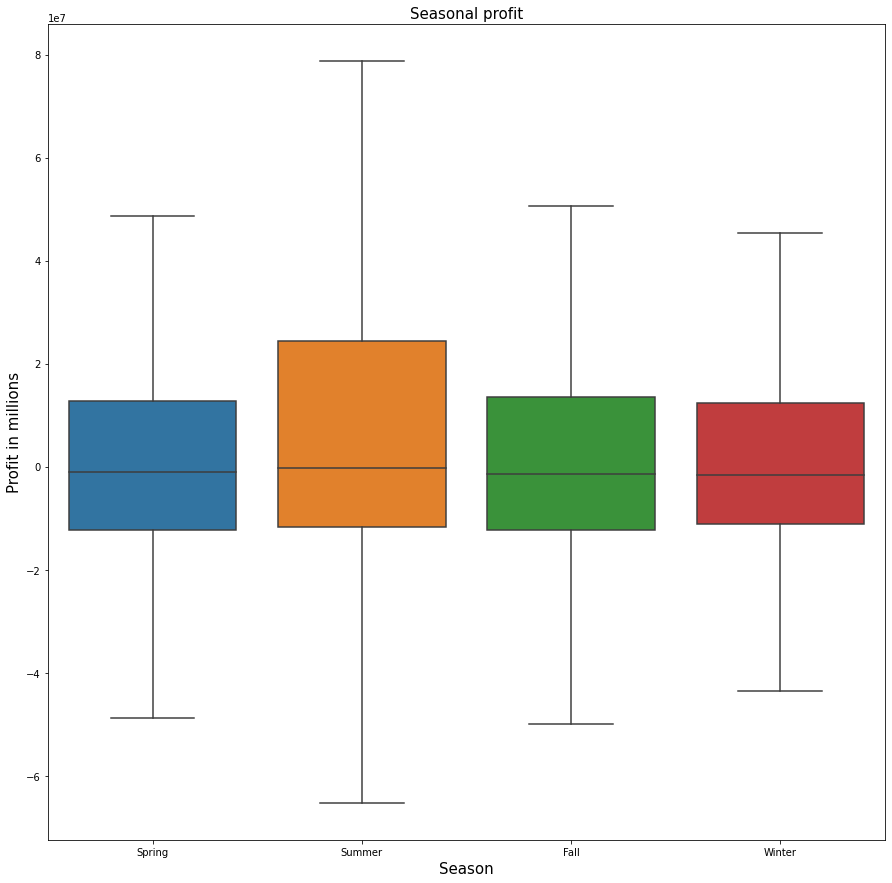

In [12]:
# Your code here
plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))

sns.boxplot(x='Season', y='profit', data=budget, ax=plot_five_ax, showfliers=False, order=order_list)

plot_five_ax.set_xlabel('Season', fontsize = 15)

plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)

plot_five_ax.set_title('Seasonal profit', fontsize = 15)


plt.savefig('images/seasonalprofits.png')

In [13]:
#Summer has the largest range which indicates a high risk of whether or not the profits will be great or negative

**Find the mean for profit, budget, and gross**

In [14]:
profit_mean = budget.profit.mean()
profit_mean

9372304.52238806

**There is a mean profit of ~ 10 million dollars. To be successful, your movies should have a profit around that number**

In [15]:
budget_mean = budget.production_budget.mean()
budget_mean

39360287.20682303

**The mean budget is ~ 31 million dollars. Your movie should average a budget around that number to ensure a promising profit.**

In [16]:
gross_mean = budget.domestic_gross.mean()
gross_mean

48732591.729211085

**The average gross for american movies is around 42 million. You should be projecting your sales towards that number to be successful.**

**Find the mean for each column in years 2015-2019. Exclude 2020 because of the skewed data.**

In [17]:
budget_groups = budget.groupby('year').mean().reset_index().astype(float)
budget_groups2 = budget_groups[budget_groups.year<2020]

budget_groups2

,year,id,production_budget,domestic_gross,profit
0,2015.0,51.260355,2.616029e+07,3.193948e+07,5.779185e+06
1,2016.0,49.643836,4.097370e+07,5.042387e+07,9.450175e+06
2,2017.0,51.422619,5.003073e+07,6.222259e+07,1.219186e+07
3,2018.0,53.286713,4.813886e+07,7.378870e+07,2.564984e+07
4,2019.0,51.791045,5.273896e+07,4.280029e+07,-9.938666e+06


**Create bar plots for yearly budget, domestic gross, and profit to examine. Use info to create a combined barplot.**

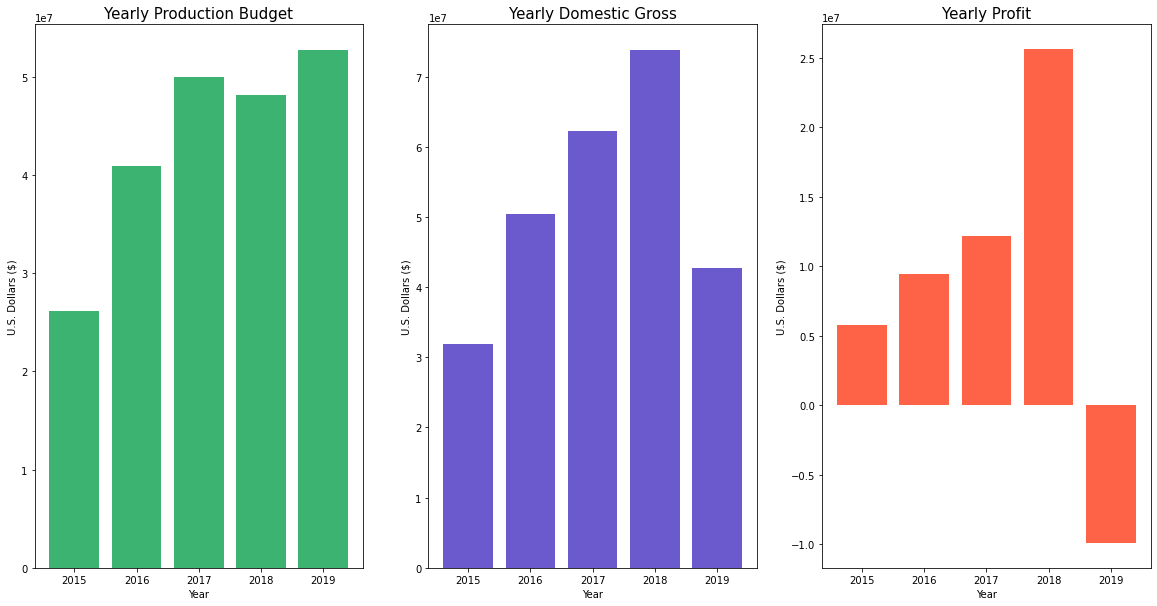

In [18]:
fig, ax = plt.subplots(figsize=(20,10), ncols=3)

ax[0].bar(budget_groups2.year, budget_groups2.production_budget, color='mediumseagreen')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('U.S. Dollars ($)')
ax[0].set_title('Yearly Production Budget', fontsize=15)

ax[1].bar(budget_groups2.year, budget_groups2.domestic_gross, color='slateblue')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('U.S. Dollars ($)')
ax[1].set_title('Yearly Domestic Gross', fontsize=15)


ax[2].bar(budget_groups2.year, budget_groups2.profit, color='tomato')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('U.S. Dollars ($)')
ax[2].set_title('Yearly Profit', fontsize=15);

plt.savefig('images/gross.png')

**Combine three graphs from above for reassurance that the more budget put in, the more profit is produced (excluding 2019, but need for further explanation)**

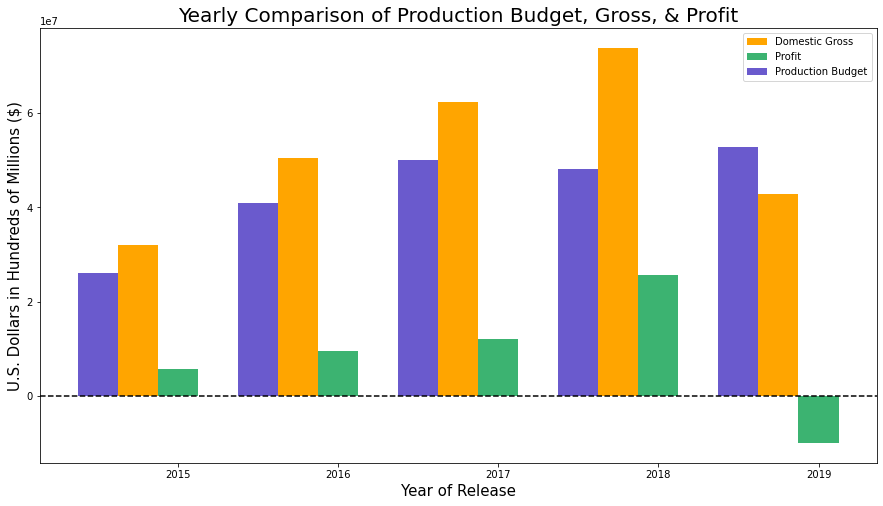

<Figure size 432x288 with 0 Axes>

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
N = 5
ind = np.arange(N) 
width = 0.25

xvals = budget_groups2['domestic_gross']
bar1 = plt.bar(ind, xvals, width, color = 'orange')

yvals2 = budget_groups2['profit']
bar2 = plt.bar(ind+width, yvals2, width, color = 'mediumseagreen')

zvals3 = budget_groups2['production_budget']
bar3 = plt.bar(ind-width, zvals3, width, color = 'slateblue')


plt.xlabel("Year of Release", fontsize=15)
plt.ylabel('U.S. Dollars in Hundreds of Millions ($)', fontsize=15)
plt.title("Yearly Comparison of Production Budget, Gross, & Profit", fontsize=20)

plt.axhline(y=0.5, color='black', linestyle='--')


plt.xticks(ind+width, ['2015','2016','2017','2018','2019'])
plt.legend( (bar1, bar2, bar3), ('Domestic Gross', 'Profit', 'Production Budget') )

plt.show()
plt.savefig('images/Yearly_comparison_profit.png')

**Create a boxplot for monthly profits to help visualize the difference between each month. Explore their ranges, max, and mins.**

In [20]:
budget

,id,release_date,movie,production_budget,domestic_gross,Season,year,month,profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019,Jun,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,2015,May,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017,Dec,303181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,Winter,2015,Dec,630662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018,Apr,378815482
...,...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,Winter,2015,Dec,-25000
5756,57,"Apr 21, 2015",The Front Man,20000,0,Spring,2015,Apr,-20000
5771,72,"May 19, 2015",Family Motocross,10000,0,Spring,2015,May,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,2018,Dec,-7000


**Make the months into ints which will help with xticklabels. Setting them to ints will make it easier to sort them and make sure they are in numerical order on the x axis.**

In [21]:
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,'Jul': 7,'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec':12}


**Apply month_map to months ; switches to numbers ; variable name = 'month_num'**

In [22]:
budget['month_num'] = budget['month'].apply(lambda x: month_map.get(x))

**Sort month_num values so they are in ascending order**

In [23]:
sorted_budget = budget.sort_values('month_num')

**Make a box plot of all the months and their profits**

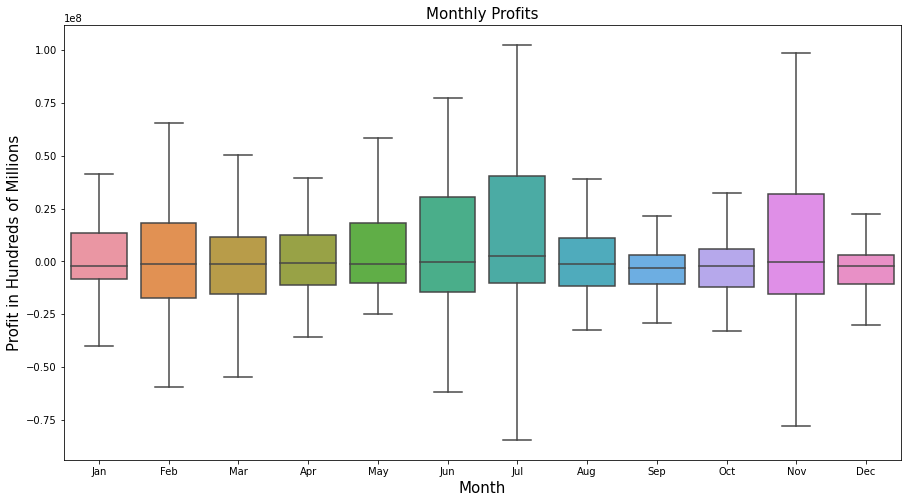

In [24]:
plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,8))

sns.boxplot(x='month', y='profit', data=sorted_budget, ax=plot_one_ax, showfliers=False)
plot_one_ax.set_xlabel('Month', fontsize=15)
plot_one_ax.set_ylabel('Profit in Hundreds of Millions', fontsize=15)
plot_one_ax.set_title('Monthly Profits', fontsize=15);
plt.savefig('images/MonthlyProfitsReal.png')



<hr><font color="green"><h1>from file: BAudience Data.ipyn</h1></font>

Importing the different programs used

In [25]:
import numpy as np

In [26]:
import pandas as pd

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Imorting the Rotten Tomatoes data set

In [29]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


Filtering the relevent columns from the Rotten Tomates data set

In [30]:
df = df[['movie_title', 'content_rating', 'audience_count']]
df

,movie_title,content_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,254421.0
1,Please Give,R,11574.0
2,10,R,14684.0
3,12 Angry Men (Twelve Angry Men),NR,105386.0
4,"20,000 Leagues Under The Sea",G,68918.0
...,...,...,...
17707,Zoot Suit,R,1195.0
17708,Zootopia,PG,101511.0
17709,Zorba the Greek,NR,7146.0
17710,Zulu,PG,30193.0


Sorting the movies by audience_count by greatest to least from the Rotten Tomatoes data set

In [31]:
df = df.sort_values('audience_count', ascending=False)
df

,movie_title,content_rating,audience_count
16297,Titanic,PG-13,35797635.0
15410,The Lord of the Rings: The Return of the King,PG-13,34679773.0
13694,Spider-Man,PG-13,34297354.0
13276,Shrek 2,PG,34232524.0
7526,Harry Potter and the Goblet of Fire,PG-13,34153607.0
...,...,...,...
17522,Working Girls,NR,NaN
17607,Yom Yom,NR,NaN
17609,Yosemite,R,NaN
17618,You Don't Need Feet to Dance,NR,NaN


Deleting null values from audience_count values

In [32]:
df = df[df['audience_count'].notna()]
df
#audience_count column ordered from greatest to least, and NaN values dropped

,movie_title,content_rating,audience_count
16297,Titanic,PG-13,35797635.0
15410,The Lord of the Rings: The Return of the King,PG-13,34679773.0
13694,Spider-Man,PG-13,34297354.0
13276,Shrek 2,PG,34232524.0
7526,Harry Potter and the Goblet of Fire,PG-13,34153607.0
...,...,...,...
6157,Evil Little Things,NR,5.0
1951,2 in the Bush: A Love Story,NR,5.0
10243,Measure for Measure,NR,5.0
7354,Guest Artist,NR,5.0


Finding the mean for audience_count 

In [33]:
df['audience_count'].mean()


143940.06833189778

Amount of movies in each content_rating

In [34]:
df.content_rating.value_counts()

R        6348
NR       5220
PG-13    2970
PG       2163
G         676
NC17       38
Name: content_rating, dtype: int64

DataFrame with movies that have a value of R in content_rating

In [35]:
df_R = df.loc[df['content_rating'] == 'R']
df_R

,movie_title,content_rating,audience_count
7052,Gladiator,R,34128168.0
2662,American Pie,R,33781574.0
10183,The Matrix,R,33324202.0
16106,There's Something About Mary,R,33121539.0
17120,Wedding Crashers,R,32961772.0
...,...,...,...
7549,Haunt,R,8.0
4794,Come to Daddy,R,8.0
14807,The Death of Dick Long,R,7.0
7376,Guns Akimbo,R,5.0


Mean audience_count for movies with a content_rating of R

In [36]:
df_R.mean()

audience_count    117463.646345
dtype: float64

DataFrame with movies that have a value of PG-13 in content_rating

In [37]:
df_PG13 = df.loc[df['content_rating'] == 'PG-13']
df_PG13

,movie_title,content_rating,audience_count
16297,Titanic,PG-13,35797635.0
15410,The Lord of the Rings: The Return of the King,PG-13,34679773.0
13694,Spider-Man,PG-13,34297354.0
7526,Harry Potter and the Goblet of Fire,PG-13,34153607.0
9014,King Kong,PG-13,33766734.0
...,...,...,...
14937,The Fight,PG-13,27.0
14352,Tesla,PG-13,14.0
12364,Red Penguins,PG-13,7.0
13943,Strange But True,PG-13,6.0


Mean audience_count for movies with a content_rating of Pg-13

In [38]:
df_PG13.mean()

audience_count    415981.044781
dtype: float64

Seaborn barplot for Average Audience per Movie by Content rating

Text(0.5, 1.0, 'Average Audience per Movie by Content Rating')

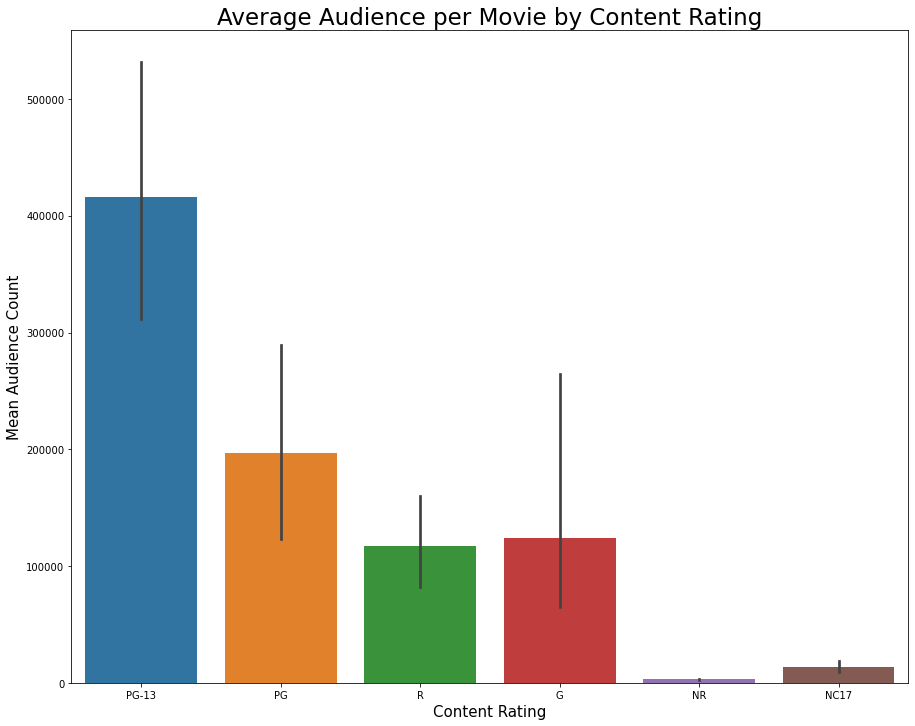

In [39]:
plot_fig, plot_ax = plt.subplots(figsize=(15, 12))

sns.barplot(x="content_rating", y="audience_count", data=df)
plot_ax.set_xlabel('Content Rating', fontsize=15)
plot_ax.set_ylabel('Mean Audience Count', fontsize=15);
plot_ax.set_title('Average Audience per Movie by Content Rating', fontsize=23)


<hr><font color="green"><h1>from file: CMovie_analysis_genres_ross</h1></font>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

**Reads in the Rotten Tomatoes csv data and prints the first few rows**

In [41]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


**Reads in the movie gross csv data and prints the first few rows**

In [42]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**Merges the two DataFrames together on the movie title and creates a DataFrame with only the data we want to work with**

In [43]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()

In [44]:
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks .info() to see how many null values are in the DataFrame rows**

In [45]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2149 non-null   object 
 1   genres              2149 non-null   object 
 2   tomatometer_rating  2148 non-null   float64
 3   domestic_gross      2137 non-null   float64
dtypes: float64(2), object(2)
memory usage: 83.9+ KB


**Removes any rows with null values**

In [46]:
df_rating_genres.dropna(inplace=True)
df_rating_genres.head(12)

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
6,Gone,"Horror, Mystery & Suspense",54.0,11700000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
9,Priest,"Action & Adventure, Horror, Mystery & Suspense...",15.0,29100000.0


**Drops the duplicate values and keeps the last instance**

In [47]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


**Checks for any more missing values and how many rows were removed**

In [48]:
df_rating_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         2063 non-null   object 
 1   genres              2063 non-null   object 
 2   tomatometer_rating  2063 non-null   float64
 3   domestic_gross      2063 non-null   float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB


**Looks at the highest and lowest gross to get a feel for which genres do best**

In [49]:
df_sorted = df_rating_genres.sort_values('domestic_gross', ascending=False)
df_sorted

,movie_title,genres,tomatometer_rating,domestic_gross
343,Black Panther,"Action & Adventure, Drama, Science Fiction & F...",96.0,700100000.0
283,Avengers: Infinity War,"Action & Adventure, Science Fiction & Fantasy",85.0,678800000.0
923,Jurassic World,"Action & Adventure, Mystery & Suspense, Scienc...",70.0,652300000.0
1096,Marvel's The Avengers,"Action & Adventure, Science Fiction & Fantasy",92.0,623400000.0
1496,Star Wars: The Last Jedi,"Action & Adventure, Drama, Science Fiction & F...",90.0,620200000.0
...,...,...,...,...
267,Jackpot,Action & Adventure,59.0,800.0
238,Amityville: The Awakening,"Horror, Mystery & Suspense",30.0,700.0
863,Into the White,"Action & Adventure, Art House & International,...",45.0,700.0
120,2:22,"Drama, Mystery & Suspense",22.0,400.0


**Splits the genres in the genres row into a list containing the genres**

In [50]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)

df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,[Comedy],87.0,4000000.0
2,Going the Distance,"[Comedy, Romance]",54.0,17800000.0
5,The Silence,"[Horror, Mystery & Suspense]",30.0,100000.0
7,Gone,[Mystery & Suspense],12.0,11700000.0
8,Fireflies in the Garden,[Drama],22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"[Art House & International, Comedy, Drama]",92.0,3100000.0
2145,Zombeavers,"[Action & Adventure, Comedy, Horror]",69.0,14900.0
2146,Zookeeper,"[Comedy, Romance]",14.0,80400000.0
2147,Zoolander 2,[Comedy],22.0,28800000.0


**Explodes the genres column which separates all the genres for each movie into its own column**

In [51]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


**Checks the data types of the columns**

In [52]:
df_rating_genres.dtypes

movie_title            object
genres                 object
tomatometer_rating    float64
domestic_gross        float64
dtype: object

**Strips any whitespace from the genres in the genres column so that we can easily pull the genres**

In [53]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()

**I only want to focus on genres with enough data points to generate sufficient means so I will only look at genres above 150 data values**

In [54]:
df_rating_genres['genres'].value_counts() 

Drama                        1145
Comedy                        632
Action & Adventure            496
Mystery & Suspense            403
Art House & International     249
Science Fiction & Fantasy     244
Romance                       175
Horror                        171
Documentary                   140
Kids & Family                 126
Animation                     116
Special Interest               89
Musical & Performing Arts      61
Sports & Fitness               21
Western                        19
Classics                       12
Television                     10
Faith & Spirituality            6
Gay & Lesbian                   1
Cult Movies                     1
Anime & Manga                   1
Name: genres, dtype: int64

**Creates a new DataFrame of all the movies classified as the specified genre**

In [55]:
df_comedy = df_rating_genres.loc[df_rating_genres['genres'] == 'Comedy']
df_romance = df_rating_genres.loc[df_rating_genres['genres'] == 'Romance']
df_horror = df_rating_genres.loc[df_rating_genres['genres'] == 'Horror']
df_mystery_suspence = df_rating_genres.loc[df_rating_genres['genres'] == 'Mystery & Suspense']
df_action_adventure = df_rating_genres.loc[df_rating_genres['genres'] == 'Action & Adventure']
df_animation = df_rating_genres.loc[df_rating_genres['genres'] == 'Animation']
df_art = df_rating_genres.loc[df_rating_genres['genres'] == 'Art House & International']
df_drama = df_rating_genres.loc[df_rating_genres['genres'] == 'Drama']

**Finds the mean of the domestic gross profit for all the relevent DataFrames**

In [56]:
#mean of the comedy gross profit 
y_comedy = round(df_comedy['domestic_gross'].mean())
y_drama = round(df_drama['domestic_gross'].mean())
y_romance = round(df_romance['domestic_gross'].mean())
y_horror = round(df_horror['domestic_gross'].mean())
y_mystery = round(df_mystery_suspence['domestic_gross'].mean())
y_action_adventure = round(df_action_adventure['domestic_gross'].mean())
y_animation = round(df_animation['domestic_gross'].mean())
y_art = round(df_art['domestic_gross'].mean())


**Finds the mean of the tomatometer rating for all the relevent genre DataFrames**

In [57]:
#mean of the comedy genre tomato ratings
x_comedy = round(df_comedy['tomatometer_rating'].mean())
x_romance = round(df_romance['tomatometer_rating'].mean())
x_horror = round(df_horror['tomatometer_rating'].mean())
x_mystery = round(df_mystery_suspence['tomatometer_rating'].mean())
x_action_adventure = round(df_action_adventure['tomatometer_rating'].mean())
x_animation = round(df_animation['tomatometer_rating'].mean())
x_art = round(df_art['tomatometer_rating'].mean())
x_drama = round(df_drama['tomatometer_rating'].mean())

**Graphs all the genre DataFrames to get an idea of which genre has the highest ratings and brought the most profit**

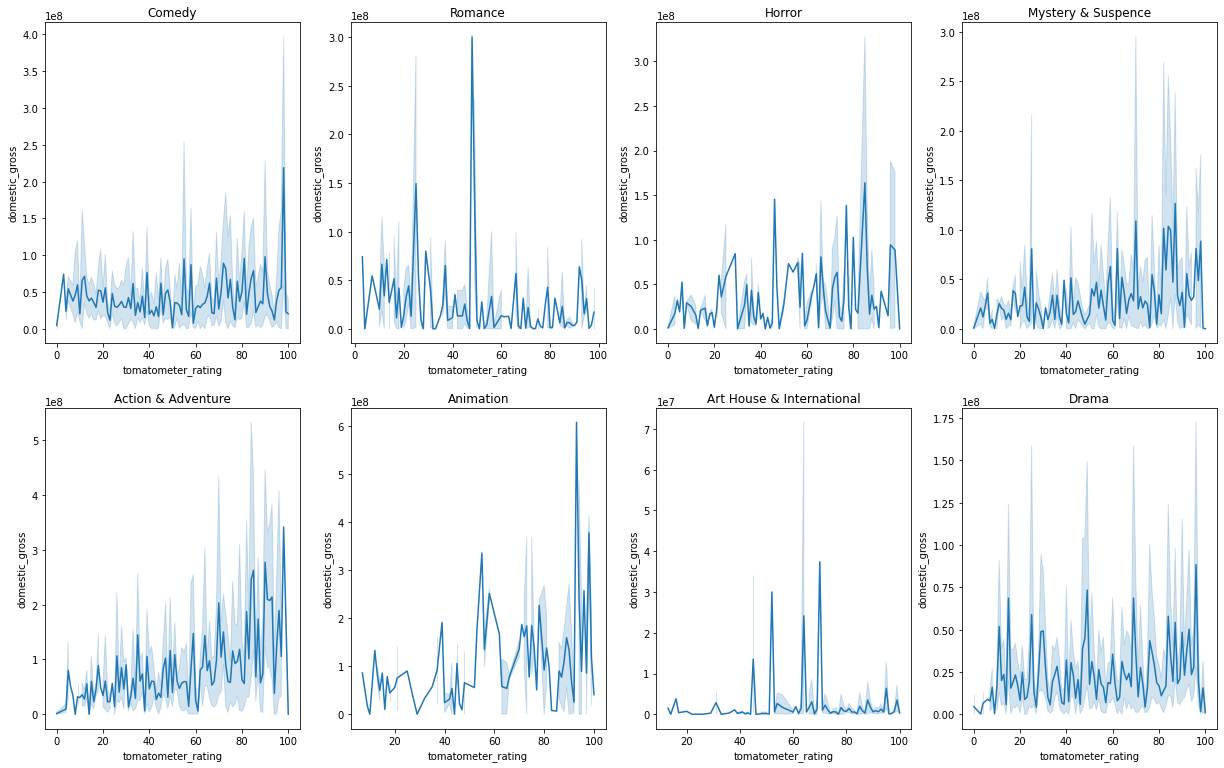

In [58]:
fig, axes =plt.subplots(nrows=2,ncols=4, figsize =(21,13))
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=axes[0][0]).set(title='Comedy')
sns.lineplot(data=df_romance, x="tomatometer_rating", y="domestic_gross", ax=axes[0][1]).set(title='Romance')
sns.lineplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=axes[0][2]).set(title='Horror')
sns.lineplot(data=df_mystery_suspence, x="tomatometer_rating", y="domestic_gross", ax=axes[0][3]).set(title='Mystery & Suspence')
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=axes[1][0]).set(title='Action & Adventure')
sns.lineplot(data=df_animation, x="tomatometer_rating", y="domestic_gross", ax=axes[1][1]).set(title='Animation')
sns.lineplot(data=df_art, x="tomatometer_rating", y="domestic_gross", ax=axes[1][2]).set(title='Art House & International')
sns.lineplot(data=df_drama, x="tomatometer_rating", y="domestic_gross", ax=axes[1][3]).set(title='Drama')
plt.savefig('images/GenresGrossRatingScatters.png');

**Comedy, Horror, and Action & Adventure appears to be the highest so this is a graph of them together**

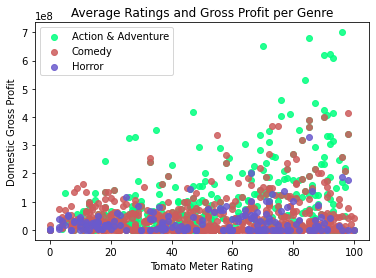

In [59]:
fig, ax = plt.subplots(1, 1)

ax.scatter(df_action_adventure['tomatometer_rating'], df_action_adventure["domestic_gross"], color="springgreen", label="Action & Adventure", alpha=0.85)
ax.scatter(df_comedy['tomatometer_rating'], df_comedy["domestic_gross"], color="indianred", label="Comedy", alpha=0.85)
ax.scatter(df_horror['tomatometer_rating'], df_horror["domestic_gross"], color="slateblue", label="Horror", alpha=0.85)
#ax.scatter(df_drama['tomatometer_rating'], df_drama["domestic_gross"], color="orange", label="Drama", alpha=0.85)

ax.set_title('Average Ratings and Gross Profit per Genre')

ax.set_ylabel('Domestic Gross Profit')
ax.set_xlabel('Tomato Meter Rating')
ax.legend();

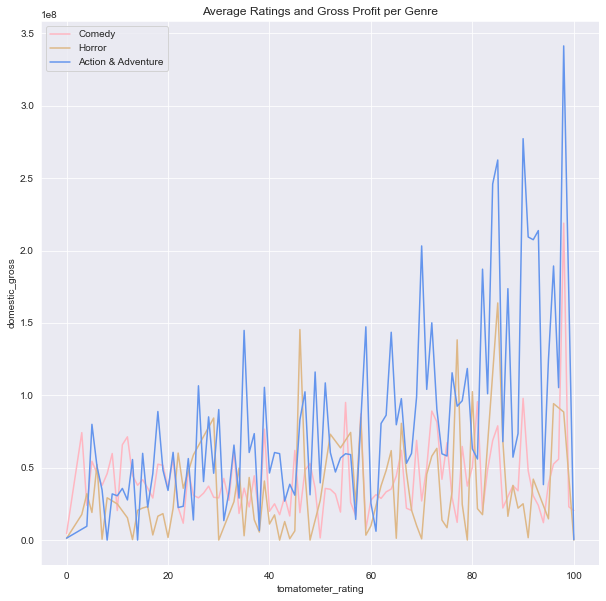

In [60]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross", ax=ax, ci=None, color='lightpink', markers=True).set(title='Average Ratings and Gross Profit per Genre')
sns.lineplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=ax, ci=None, color='burlywood')
sns.lineplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=ax, ci=None, color='cornflowerblue')
ax.legend(['Comedy', 'Horror', 'Action & Adventure']);

**These are a little busy lets split them up and show them in a linear regression plot**

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), ncols=3)
#sns.set(font_scale = 1.5)
sns.regplot(data=df_comedy, x="tomatometer_rating", y="domestic_gross",ax=ax[0]).set(title='Comedy')
sns.regplot(data=df_action_adventure, x="tomatometer_rating", y="domestic_gross", ax=ax[1]).set(title='Action & Adventure')
sns.regplot(data=df_horror, x="tomatometer_rating", y="domestic_gross", ax=ax[2]).set(title='Horror')

plt.savefig('images/LinearRegressionRatingsGrossGenreSplit.png');

**Lets simplify this to just show the linear regression lines for these top three genres and put them back together**

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9,7))

ax.set_facecolor('gainsboro')

x = np.array(df_comedy['tomatometer_rating'])
y = np.array(df_comedy['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='cornflowerblue', linewidth=3.5)

x = np.array(df_action_adventure['tomatometer_rating'])
y = np.array(df_action_adventure['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='lightcoral', linewidth=3.5)

x = np.array(df_horror['tomatometer_rating'])
y = np.array(df_horror['domestic_gross'])

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color='mediumseagreen', linewidth=3.5)

ax.set_title('Linear Regression of Ratings and Gross Profit per Genre', fontsize=16)

ax.set_ylabel('Domestic Gross Profit', fontsize=15)
ax.set_xlabel('Rotten Tomato Meter Rating',fontsize=15)

plt.legend(['Comedy','Action & Adventure', 'Horror'], fancybox=True, framealpha=1, shadow=True, 
           borderpad=1.5, prop={"size":15}, facecolor='whitesmoke')
plt.savefig('images/LinearRegressionRatingsGrossGenre.png');

**This is a scatter plot of the means of the ratings and gross profit columns for all the genres graphed together on a scatter plot**

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x_comedy,y_comedy, marker='s', linewidth=11)
ax.scatter(x_romance,y_romance, marker='s', linewidth=11)
ax.scatter(x_horror,y_horror, marker='s', linewidth=11)
ax.scatter(x_mystery,y_mystery, marker='s', linewidth=11)
ax.scatter(x_action_adventure,y_action_adventure, marker='s', linewidth=11)
ax.scatter(x_animation,y_animation, marker='s', linewidth=11)
ax.scatter(x_art,y_art, marker='s', linewidth=11, color='violet')
ax.scatter(x_drama,y_drama, marker='s', linewidth=11, color='black')


ax.legend(['Comedy', 'Romance', 'Horror', 'Mystery', 'Action & Adventure', 'Animation',
          'Art', 'Drama'], prop={"size":13}, fancybox=True, framealpha=1, shadow=True)

ax.set_xlabel('Mean Tomato Ratings')
ax.set_ylabel('Mean Gross Profit')
ax.set_title('Average Ratings and Gross Profit per Genre')
ax.set_facecolor('lightgrey')
plt.savefig('images/AverageRatingsGrossperGenre.png')

**It appears that the Action & Adventure genre will bring the most domestic profit and have the highest rating**

**----------------------------------------------------------------------------------------------------**

**Now lets put the months data together with our genre info to get the best months to release each genre**

In [ ]:
seasons_merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_seasons = merged[['movie_title','genres', 'domestic_gross', 'original_release_date']].copy()

In [ ]:
df_rating_seasons

**Checks the info to check that they DataFrames merged correctly**

In [ ]:
df_rating_seasons.info()

**Drop the null values**

In [ ]:
df_rating_seasons.dropna(inplace=True)

**Drops duplicates from the merge**

In [ ]:
df_rating_seasons.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_seasons

**Splits the genres at the commas and puts them in a list**

In [ ]:
df_rating_seasons['genres'] = df_rating_seasons['genres'].str.split(',', expand = False)

**Explodes the new lists to new rows**

In [ ]:
df_rating_seasons = df_rating_seasons.explode('genres')

**Strips the whitespace**

In [ ]:
df_rating_seasons['genres'] = df_rating_seasons['genres'].str.strip()

**Grabs the month from the release date column**

In [ ]:
df_rating_seasons['month'] = df_rating_seasons['original_release_date'].apply(lambda x: x[5:7])
df_rating_seasons

**Makes a new column of the month names so that we can easily group by months**

In [ ]:
df_rating_seasons['month_name'] = df_rating_seasons['month'].map({'01':'January',
'02':'February',
'03':'March',
'04':'April',
'05':'May',
'06':'June',
'07':'July',
'08':'August',
'09':'September',
'10':'October',
'11':'November',
'12':'December'})
df_rating_seasons

**Groups the genres and month_name columns with the gross mean**

In [ ]:
real_df = df_rating_seasons.groupby(['genres', 'month_name']).mean().reset_index()
real_df

**Graphs the Average Gross per Month by Genre**

In [ ]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(15, 8))

filtered = real_df.loc[(real_df['genres'] == 'Comedy')|(real_df['genres'] == 'Horror')|(real_df['genres']=='Action & Adventure')]
x = sns.scatterplot(data = filtered, x = "month_name", y = "domestic_gross", hue ='genres', palette=['red','green','blue'], alpha=.75, s=100);

ax.legend(prop={"size":15}, loc=1, fancybox=True, framealpha=1, shadow=True, 
           borderpad=1.5, facecolor='whitesmoke')
x.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Domestic Gross in U.S. Dollar', fontsize=20)
ax.set_title('Average Gross per Month by Genre', fontsize=25)

plt.savefig('images/AvgGrossPerMonthByGenre.png');


<hr><font color="green"><h1>from file: movie_analysis_tables</h1></font>

Importing the different programs used

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Importing the Rotten Tomatoes data set

In [ ]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df

Importing the Bom movie gross data set

In [ ]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross

Importing the movie budgets data set

In [ ]:
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_budgets

Replacing the '$' and ',' in the movie budgets dat set, so that they can be numeric values.

In [ ]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',', '')
df_budgets

Converting domestic_gross and production_budget columns to numbers, and dropping the worldwide_gross column. Dropped the worldwide gross because we are not utilizing it, and converting to numbers so we can use math with the values in the other two columns.

In [ ]:
df_budgets[['domestic_gross', 'production_budget']] = df_budgets[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
df_budgets = df_budgets.drop(columns="worldwide_gross")
df_budgets

Creating a 'profit' column by subtracting production_budget from domestic_gross in order to show how much a movie is making.

In [ ]:
df_budgets["profit"] = df_budgets["domestic_gross"] - df_budgets["production_budget"]
df_budgets

Merged the Rotten Tomatoes data set with the Bom movie data set to create the rating_genres dataframe in order to have domestic gross with the genres.

In [ ]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()
df_rating_genres

Dropping any null values from all columns in the rating_genres dataframe that we just merged so that there is no outliers without any value.

In [ ]:
df_rating_genres.dropna(inplace=True)
df_rating_genres

Dropping duplicates in the movie_title column so the data does not get skewed by the duplicates.

In [ ]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

Making the genres column values into a list to be able to explode the genre column.

In [ ]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)
df_rating_genres

Exploding the genre column so that all the genres are seperated.

In [ ]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

Now every movie has its own row with each of its genre.

In [ ]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()
df_rating_genres

Merging the df_rating_genres dataframe with the df_budgets dataframe, in order to get production_budget into the dataframe

In [ ]:
merged = pd.merge(df_rating_genres, df_budgets, left_on='movie_title', right_on='movie')
df_production = merged[['movie', 'genres', 'production_budget']].copy()
df_production

Sorting the production_budget column from greatest to least to see what the highest values are.

In [ ]:
df_sorted = df_production.sort_values('production_budget', ascending=False)
df_sorted

Making the production budget in hundreds of thousands so it is easier to read on the graph.

In [ ]:
df_sorted['new_x'] = df_sorted['production_budget'] / 100000

In [ ]:
df_sorted['new_x'] = df_sorted['new_x'].sort_values(ascending=False)
df_sorted['new_x']

Ordered where we want the genres to be on the y-axis so that its greatest to least.

In [ ]:
order_list = ['Science Fiction & Fantasy', 'Animation', 'Kids & Family', 'Action & Adventure', 'Classics', 'Western', 'Sports & Fitness', 'Comedy', 'Musical & Performing Arts', 'Drama', 'Mystery & Suspense', 'Romance', 'Horror', 'Art House & International', 'Television', 'Special Interest', 'Faith & Spirituality', 'Documentary', 'Cult Movies']

Seaborn barplot to show average spent on production by genre.

In [ ]:
plot_fig_two, plot_two_ax = plt.subplots(figsize=(25, 20))

sns.barplot(x='new_x', y='genres', data=df_sorted, order=order_list)

plot_two_ax.set_xlabel('Average Spent on Production in Thousands', fontsize=45)
plot_two_ax.set_ylabel('Genres', fontsize=45)
plot_two_ax.set_title('Average Spent on Production by Genre', fontsize=60)


locs, labels = plt.xticks(fontsize=30)
locs, labels = plt.yticks(fontsize=30)
#plt.setp(labels, rotation=90, fontsize=30)
plt.savefig('average_production.png');